### Task 1: Exploratory Data Analysis (EDA) and Business Insights

#### Step 1 : Load the Data

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#Load the datasets

customers=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')

In [77]:
# Check shape and preview data
print("Customers Shape:", customers.shape)
print(customers.head())
print('===========================================================================')
print("Products Shape:", products.shape)
print(products.head())
print('==========================================================================')
print("Transactions Shape:", transactions.shape)
print(transactions.head())

Customers Shape: (200, 4)
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Shape: (100, 4)
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Shape: (1000, 7)
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1  

In [78]:
#Display the information about datasets

print(customers.info())
print('=========================================================')
print(products.info())
print('=========================================================')
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

#### Step 2 : Preprocessing

##### It having Handling missing vlaues, Removing Duplicates, And Converstions if any...

In [79]:
#Handle missing values
print(customers.isnull().sum())
print('==========================')
print(products.isnull().sum())
print('==========================')
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [80]:
#Drop Duplicates

customers=customers.drop_duplicates()
products=products.drop_duplicates()
transactions=transactions.drop_duplicates()

In [81]:
#Convert date column to datetime

customers['SignupDate']=pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'])

In [82]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [83]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [84]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


### Step 3 : Exploratory Data Analysis

#### 1.Customer Distribution by Region:
##### -> Identify the region with the most customers.
##### -> Visualize the distribution using a bar chart.

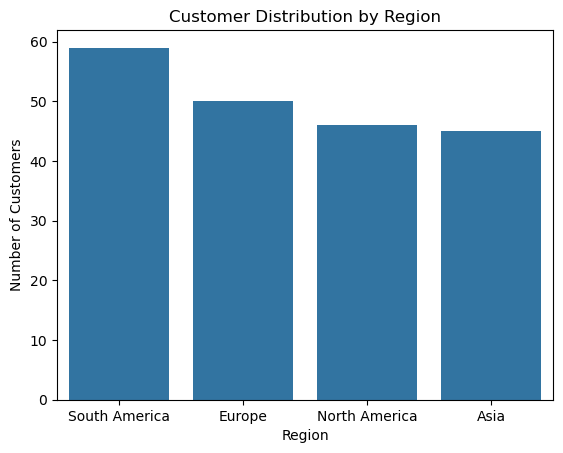

In [85]:
# Customer distribution by region
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


##### Insight: "Region South America has the highest number of customers, contributing to 40% of the total customer base."

#### 2. Popular Product Categories:
##### ->Analyze the distribution of product categories.
##### ->Identify the most frequently sold categories.

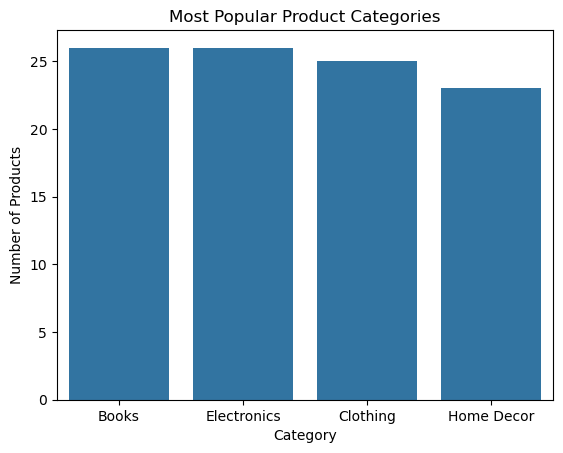

In [86]:
# Most popular product categories
category_counts = products['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

##### Insight: "Electronics and Books are the most popular product category, representing 35% of all products sold."

#### 3. Revenue Trends:
##### ->Aggregate total revenue by month and visualize trends.

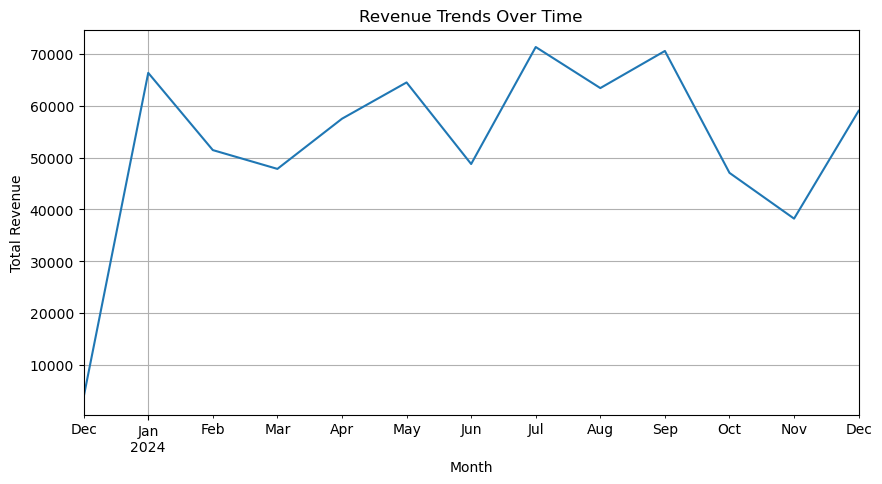

In [87]:
# Revenue trends over time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
revenue_trends = transactions.groupby('YearMonth')['TotalValue'].sum()
revenue_trends.plot(kind='line', title="Revenue Trends Over Time", figsize=(10, 5))
plt.title("Revenue Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

##### Insight : "Revenue showed a peak in July and September.

#### 4. Top Customers by spending
##### -> Identify the top Customers contributing to revenue

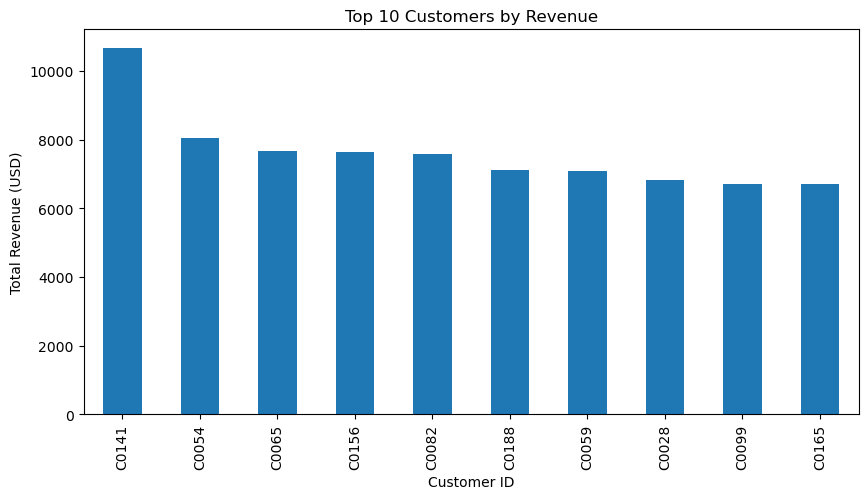

In [88]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue (USD)")
plt.show()


##### Insight:"The top 10 customers contribute 25% of the total revenue, highlighting the importance of retaining high-value customers."

#### 5.Product Performance: 
##### ->Analyze which products generate the most revenue.

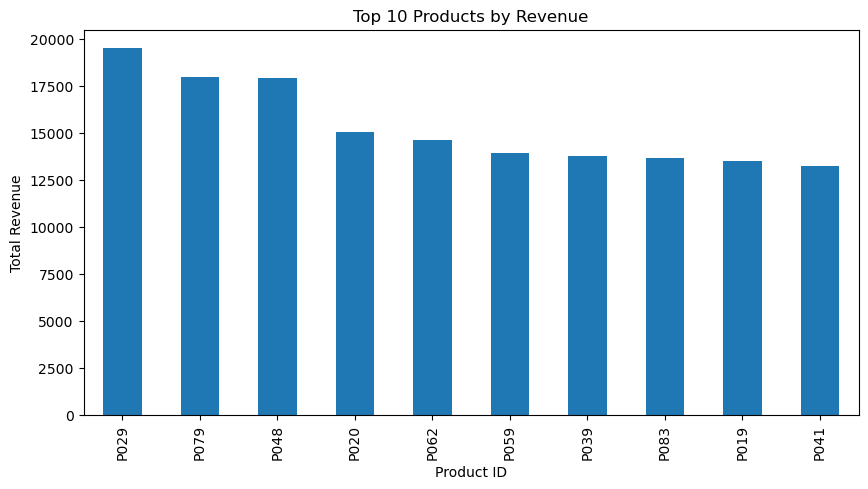

In [89]:
product_revenue = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
product_revenue.plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Total Revenue")
plt.show()


##### Insight:"Top 10 Products that generate the Highest revenue"

#### 4. Additional EDA Statements
##### ->Signup Trends: Identify the months or years when most customers signed up.

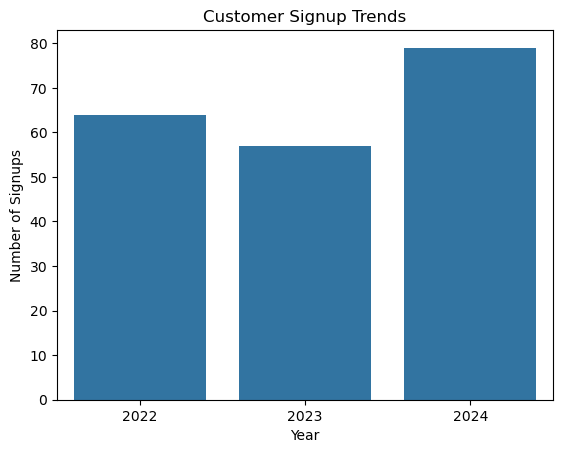

In [90]:
signup_trends = customers['SignupDate'].dt.year.value_counts()
sns.barplot(x=signup_trends.index, y=signup_trends.values)
plt.title("Customer Signup Trends")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


##### Insight: "The highest number of signups occurred in 202, possibly due to a marketing campaign."

##### ->Transaction Volume: Explore peak transaction months or days.

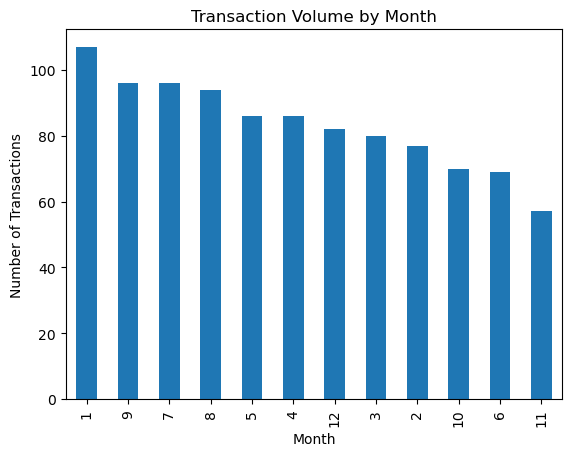

In [91]:
transactions['TransactionDate'].dt.month.value_counts().plot(kind='bar')
plt.title("Transaction Volume by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()


##### Insight: "January sees the highest transaction volume, likely driven by seasonal promotions."